In [ ]:
!pip install pygad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 443.7 kB/s eta 0:00:00


In [ ]:
import pygad
import numpy
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def func_3D(x,y):
  x1 = (np.sqrt((x*x + y*y)*0.5)) * -0.2
  x2 = np.exp(0.5*(np.cos(x*2*np.pi) + np.cos(y*2*np.pi)))
  wyn = 20*np.exp(x1)
  wyn = wyn + x2
  wyn = wyn - 20 - np.exp(1)

  return wyn

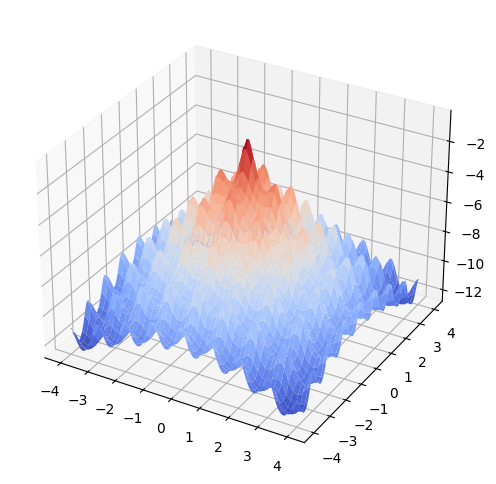

In [ ]:
x = np.linspace(-4,4,100)
y = np.linspace(-4,4,100);
X, Y = np.meshgrid(x,y)
Z = func_3D(X,Y)
plt.rcParams['figure.figsize'] = (6,6)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surface = ax.plot_surface(X,Y,Z, cmap='coolwarm')
plt.show()

In [ ]:
# Definicja funkcja dopasowania
def fitness_func(ga_instance, solution, solution_idx):
  return func_3D(solution[0],solution[1])

In [ ]:
last_fitness = 0
def on_generation(ga_instance):
  global last_fitness
  print(f"Generation = {ga_instance.generations_completed}")
  print(f"Fitness = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
  print(f"Change = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
  print()
  last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]
  #wykres_populacji(ga_instance)


In [ ]:
ga_instance = pygad.GA(num_generations=50,
                       num_parents_mating=20,
                       sol_per_pop=20,
                       num_genes=2,
                       init_range_low=-4,
                       init_range_high=4,
                       fitness_func=fitness_func,
                       crossover_type='single_point',
                       parent_selection_type='rws',
                       mutation_by_replacement=True,
                       random_mutation_min_val=-4,
                       random_mutation_max_val=4,
                       mutation_type='random',
                       mutation_percent_genes=10,
                       on_generation=on_generation)

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


In [ ]:
print(ga_instance.population)

[[ 2.55119945  0.71454584]
 [ 2.1246048  -0.52768984]
 [-2.4342608   2.19134733]
 [ 2.24499459  2.51304595]
 [-2.05221004 -2.66995516]
 [ 3.59129856 -2.17742396]
 [ 3.26356477  1.67298882]
 [ 1.71466778 -1.79614154]
 [-3.17466637 -2.97363926]
 [ 2.93442557  1.4204764 ]
 [ 3.12226729  0.05740408]
 [-3.33331186 -0.23780398]
 [ 0.72885078  0.00870899]
 [ 0.85940676  2.15233641]
 [ 2.77248998 -0.03639197]
 [-1.35592665 -2.10614661]
 [ 2.96781648  3.85892242]
 [-3.31362876  0.06136547]
 [ 3.66255939 -3.83020874]
 [-3.67878081 -1.33947124]]


In [ ]:
def wykres_populacji(ga_instance):
  x = np.linspace(-4, 4, 100)
  y = np.linspace(-4, 4, 100)
  X, Y = np.meshgrid(x, y)
  Z = func_3D(X,Y)
  plt.contour(X, Y, Z, cmap='coolwarm')
  plt.plot(ga_instance.population[:,0], ga_instance.population[:,1], 'bo')
  plt.show()

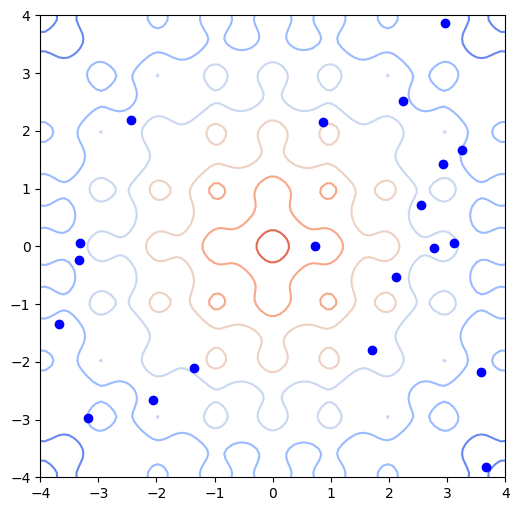

In [ ]:
#prezentowanie całej populacji rozwiązań
wykres_populacji(ga_instance)

In [ ]:
ga_instance.run()

Generation = 1
Fitness = -3.135345897284257
Change = -3.135345897284257

Generation = 2
Fitness = -1.0004214600204837
Change = 2.1349244372637735

Generation = 3
Fitness = -1.0004214600204837
Change = 0.0

Generation = 4
Fitness = -1.0004214600204837
Change = 0.0

Generation = 5
Fitness = -1.0004214600204837
Change = 0.0

Generation = 6
Fitness = -1.0004214600204837
Change = 0.0

Generation = 7
Fitness = -1.0004214600204837
Change = 0.0

Generation = 8
Fitness = -1.0004214600204837
Change = 0.0

Generation = 9
Fitness = -1.0004214600204837
Change = 0.0

Generation = 10
Fitness = -1.0004214600204837
Change = 0.0

Generation = 11
Fitness = -1.0004214600204837
Change = 0.0

Generation = 12
Fitness = -1.0004214600204837
Change = 0.0

Generation = 13
Fitness = -1.0004214600204837
Change = 0.0

Generation = 14
Fitness = -1.0004214600204837
Change = 0.0

Generation = 15
Fitness = -1.0004214600204837
Change = 0.0

Generation = 16
Fitness = -1.0004214600204837
Change = 0.0

Generation = 17
Fitn

In [ ]:
# Wypisanie najlepszych rozwiazan
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parametery najlepszego rozwiązania : {solution}")
print(f"Wartosc dla najlepszego rozwiazania = {solution_fitness}")

Parametery najlepszego rozwiązania : [0.00235375 0.13808774]
Wartosc dla najlepszego rozwiazania = -0.8271988375993122


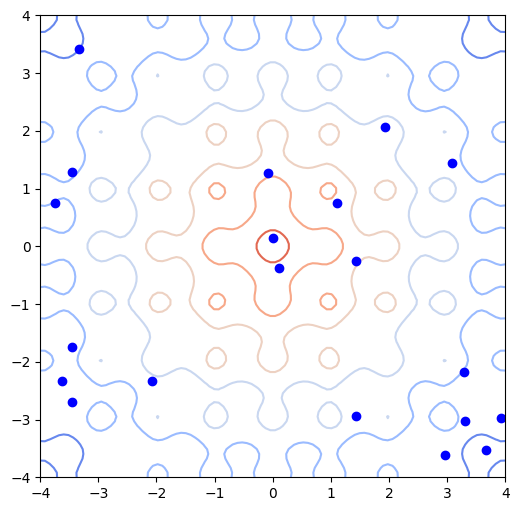

In [ ]:
#prezentowanie całej populacji rozwiązań
wykres_populacji(ga_instance)